#__Описание данных__
- ads_data.csv – данные взаимодействий с рекламными объявлениями

    * date – дата
    * time – время
    * event – действие (просмотр/клик)
    * platform – платформа
    * ad_id – id объявления
    * client_union_id – id рекламного кабинета
    * campaign_union_id – id рекламной кампании
    * ad_cost_type – тип оплаты
    * ad_cost – цена
    * has_video – есть ли видео
    * target_audience_count – размер аудитории

  &nbsp;
-   ads_clients_data.csv – характеристики рекламных клиентов


    * date – дата
    * client_union_id – id рекламного кабинета
    * community_id – id сообщества
    * create_date – дата создания рекламного клиента

In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
ads_data = (
    pd.read_csv(r'D:\downloads\my_files\mnt\HC_Volume_18315164\home-jupyter\jupyter-ale-nikitin\shared\homeworks\python_ds_miniprojects\6\ads_data.csv')
)

ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


__Посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.__

In [5]:
(
ads_data.groupby(['ad_id', 'event'], as_index=False)
.agg({'time': 'count'})
.rename(columns={'time': 'nmbr'})
.pivot(columns='event', index='ad_id', values='nmbr')
.fillna(0)
.mean()
.round()
)

event
click    113.0
view     923.0
dtype: float64

__Посмотрим на распределение показов объявлений__

C:\Temp\ipykernel_2480\1633402861.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(view_number.views_nmbr)


<AxesSubplot: xlabel='views_nmbr', ylabel='Density'>

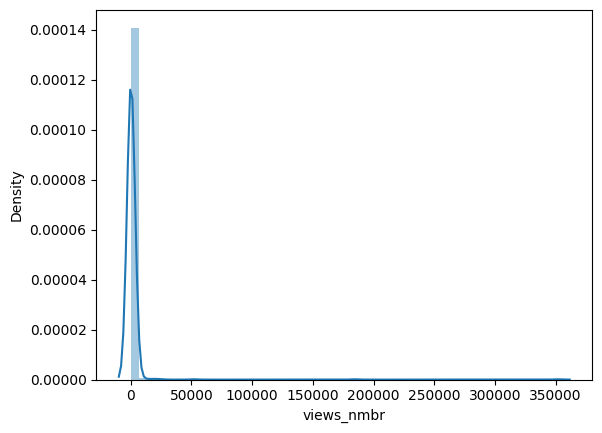

In [6]:
view_number = (
    ads_data.query("event == 'view'")
    .groupby('ad_id').agg({'event': 'count'})
    .rename(columns={'event': 'views_nmbr'})
)
sns.distplot(view_number.views_nmbr)

Прологорифмируем количество показов, чтобы график был более наглядным

C:\Temp\ipykernel_2480\2426290923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(view_number.log_view_nmbr)


<AxesSubplot: xlabel='log_view_nmbr', ylabel='Density'>

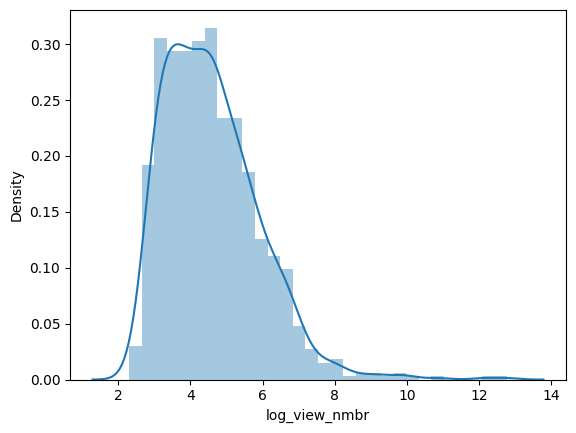

In [7]:
view_number['log_view_nmbr'] =  np.log(view_number.views_nmbr)
sns.distplot(view_number.log_view_nmbr)

__Теперь найдем среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитаем скользящее среднее по полученному результату с окном в 2 элемента. Узнаем, какое значение скользящего среднего получим за 6 апреля 2019 года и округлим ответ до целого числа.__

In [20]:
 ads_view_per_date =  (
                        ads_data[ads_data['event'] == 'view']
                        .pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')
                      )


                      
ads_view_per_date.mean().rolling(window=2).mean().loc['2019-04-06'].round()

598.0

__Скользящее среднее часто используется для поиска аномалий в данных. Попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных.__
__Посчитаем, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним. Дни, в которых скользящее среднее равно NaN, не учитываем__.

In [26]:
simple_mean = ads_view_per_date.mean()
rolling_mean = ads_view_per_date.mean().rolling(window=2).mean().dropna()

<AxesSubplot: xlabel='date'>

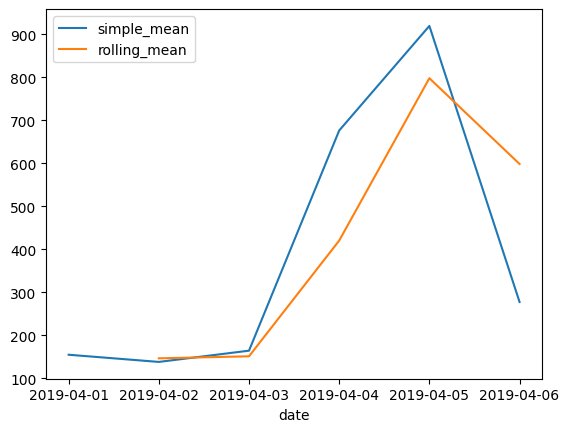

In [30]:
sns.lineplot(simple_mean, label='simple_mean')
sns.lineplot(rolling_mean, label='rolling_mean')

In [35]:
abs(simple_mean[1:] - rolling_mean).idxmax()

'2019-04-06'

__Объединим данные рекламы с данными о рекламных клиентах и найдем среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).__

D:\downloads\my_files\mnt\HC_Volume_18315164\home-jupyter\jupyter-ale-nikitin\shared\homeworks\python_ds_miniprojects\6

In [42]:
ads_clients_data = (
    pd.read_csv
    (r'D:\downloads\my_files\mnt\HC_Volume_18315164\home-jupyter\jupyter-ale-nikitin\shared\homeworks\python_ds_miniprojects\6\ads_clients_data.csv')
)

In [43]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [50]:
full_data = ads_data.drop(columns=['date']).merge(ads_clients_data, on='client_union_id')#.rename()
full_data.head()

,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date,community_id,create_date
0,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [52]:
full_data.dtypes

time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
date                      object
community_id               int64
create_date               object
dtype: object

Необходимо привести колонки с временными данными к соотвествующему формату

In [70]:
full_data[['date', 'create_date']] = full_data[['date', 'create_date']].apply(pd.to_datetime)
full_data.dtypes

time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
date                     datetime64[ns]
community_id                      int64
create_date              datetime64[ns]
dtype: object

In [78]:
(
full_data.groupby('client_union_id')
.apply(lambda group: (group.date - group.create_date).min())
.mean()
)

Timedelta('524 days 07:19:54.272076376')

__Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 450 дней.__

In [86]:
below_border = (
                full_data[(full_data['date'] - full_data['create_date']) < pd.Timedelta(450, unit='d')]
                .shape[0] # искомые объявления
)
round(below_border / full_data.shape[0] * 100, 2)

3.26